In [1]:
import pandas as pd

### Problem 1 - Linear Regression with Direct Minimization

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pickle
from sklearn.datasets import make_classification

## Part 1 - Linear Regression

In [26]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')
df1 = pd.read_pickle("diabetes.pickle")
df = pd.DataFrame(
    ytrain
)

df

,0
0,151
1,75
2,141
3,206
4,135
5,97
6,138
7,63
8,110
9,310


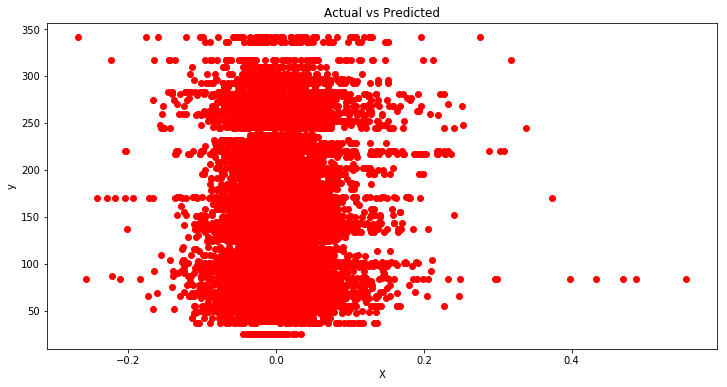

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(Xtrain, ytrain, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [29]:

print('PROBLEM 1')
print('----------')

PROBLEM 1
----------


In [28]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    
    
    N = X.shape[0]
    d = X.shape[1]
    w = np.zeros((d,1))
    ymean = 0
    xmean = np.zeros((d,1))
    
    for i in range(N):
#         add all the y's
        ymean += y[i]
        for j in range(d):
#             add all the x's in each column
            xmean[j] += X[i][j]
#     average the y's
    ymean = ymean / N
#     average each column of x's
    for i in range(d):
        xmean[i] = xmean[i] / N
        
    a = np.zeros((d, 1))
    w = np.zeros((d, 1))
    num = 0
    den = 1
    for i in range(d):
        for j in range(N):
            num += (X[j][i] - xmean[i]) * (y[j] - ymean)
            den += (X[j][i] - xmean[i])**2        
        w[i] = num / den
        a[i] = ymean - (w[i] * xmean[i])
    
    est = np.zeros((d, 1))
    for i in range(d):
        for j in range(N):
            est[i] = a[i] + (w[i] * X[j, i])
    return w

In [30]:
def testOLERegression(w,X,y):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # rmse = scalar value
    N = X.shape[0]
    d = X.shape[1]
    ymean = 0
    xmean = np.zeros((d,1))
    a = np.zeros((d, 1))
    for i in range(N):
#         add all the y's
        ymean += y[i]
        for j in range(d):
#             add all the x's in each column
            xmean[j] += X[i][j]
#     average the y's
    ymean = ymean / N
#     average each column of x's
    for i in range(d):
        xmean[i] = xmean[i] / N
        a[i] = ymean - (w[i] * xmean[i])
    
    est = np.zeros((d, 1))
    y2 = 0
    for i in range(d):
        for j in range(N):
            est[i] = a[i] + (w[i] * X[j, i])
        y2 += (est[i] - y[i])**2
    y2 = y2 / d
    

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    rmse = np.sqrt(y2)
    return rmse

In [31]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
x1 = np.ones((len(Xtrain),1))
x2 = np.ones((len(Xtest),1))

Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(Xtrain,ytrain)
w_i = learnOLERegression(Xtrain_i,ytrain)

rmse = testOLERegression(w,Xtrain,ytrain)
rmse_i = testOLERegression(w_i,Xtrain_i,ytrain)
print('RMSE without intercept on train data - %.2f'%rmse)
print('RMSE with intercept on train data - %.2f'%rmse_i)

rmse = testOLERegression(w,Xtest,ytest)
rmse_i = testOLERegression(w_i,Xtest_i,ytest)
print('RMSE without intercept on test data - %.2f'%rmse)
print('RMSE with intercept on test data - %.2f'%rmse_i)


RMSE without intercept on train data - 71.24
RMSE with intercept on train data - 72.29
RMSE without intercept on test data - 88.91
RMSE with intercept on test data - 87.11


### Problem 2 - Linear Regression with Gradient Descent

In [32]:
print('PROBLEM 2')
print('----------')

PROBLEM 2
----------


In [36]:
def regressionObjVal(w, X, y):

    # compute squared error (scalar) with respect
    # to w (vector) for the given data X and y      
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar value

#     N = X.shape[0]
#     w = learnOLERegression(X,y)
#     error = 0
    
# #     for i in range(1,N):
    w = learnOLERegression(X,y)
#     w = w[:,np.newaxis]
    print(w.shape)
    math = (y - np.dot(X,w))
#     j = np.dot(np.transpose(math), math)
    j = np.matmul(np.transpose(math),math)
    j = j / 2
    
    print(j.shape)
    print(j)
    return j
    
#     sqr_err = testOLERegression(w,X,y)**2
#     print(sqr_err)
        
#     print(j)
    
#     return error

#     d = len(y)
#     beta = X.dot(w)
#     print(w.shape)
#     diff = beta - y
#     delta = (1/2*d) * np.sum(diff**2)

#     print(testOLERegression(learnOLERegression(X,y),X,y)**2)
#     return testOLERegression(learnOLERegression(X,y),X,y)**2
#     print(delta)
#     return delta


In [49]:
def regressionGradient(w, X, y):

    # compute gradient of squared error (scalar) with respect
    # to w (vector) for the given data X and y   
    
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # gradient = d length vector (not a d x 1 matrix)

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE 

    error_grad = np.zeros((X.shape[1],))
    
#     err = regressionObjVal(w, X, y)
#     error_grad = np.dot(X,err)
#     error_grad = error_grad / X.shape[0]

#     beta = np.dot(X,w)
#     diff = y - beta
#     d = len(y)
#     xt = np.transpose(X)
#     grad = np.dot(xt,diff) / d
    
#     print(grad.shape)
    w = w[:,np.newaxis]
    print(w.shape)

    first = np.dot(np.transpose(X),X)
    first = np.dot(first,w)
    second = np.dot(np.transpose(X),y)
    loss = first - second
    loss.flatten() 
    print(loss.shape)

    grad = 0
    return loss

In [50]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
rmse = testOLERegression(w,Xtrain_i,ytrain)
print('Gradient Descent Linear Regression RMSE on train data - %.2f'%rmse)
rmse = testOLERegression(w,Xtest_i,ytest)
print('Gradient Descent Linear Regression RMSE on test data - %.2f'%rmse)

(65, 1)
(65, 1)
(65, 1)
(1, 1)
[[5008719.00521298]]


ValueError: shapes (65,1) and (65,1) not aligned: 1 (dim 1) != 65 (dim 0)

## Part 2 - Linear Classification

### Problem 3 - Perceptron using Gradient Descent

In [ ]:
print('PROBLEM 3')
print('----------')

In [ ]:
def predictLinearModel(w,Xtest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # Output:
    # ypred = N x 1 vector of predictions

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    ypred = np.zeros([Xtest.shape[0],1])
    return ypred

In [269]:
def evaluateLinearModel(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # acc = scalar values

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    acc = 0
    
    N = Xtest.shape[0]
    total = 0
    correct = 0
    
    for i in range(N):
        temp_x = Xtest[i]
        temp_x = temp_x[:,np.newaxis]
        est = np.dot(np.transpose(w),temp_x)
        if est >= 0.5:
            est = 1
        else:
            est = -1
        act = ytest[i]
#         print(est)
#         print(act)
        if est == act:
            correct += 1
        total += 1
        
    acc = correct / total
    
    return acc

In [256]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Perceptron Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Perceptron Accuracy on test data - %.2f'%acc)

NameError: name 'regressionObjVal' is not defined

### Problem 4 - Logistic Regression Using Newton's Method

In [257]:
print('PROBLEM 4')
print('----------')

PROBLEM 4
----------


In [258]:
def logisticObjVal(w, X, y):

    # compute log-loss error (scalar) with respect
    # to w (vector) for the given data X and y                               
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    error = 0

    N = X.shape[0]
    
    # Equation (9)
    # J(w) = (1/n) SUM[from i=1 to n](log(1 + exp(-y[i]w^Tx[i])))     ----> equation (9)
    sum = 0
    for i in range(N):
        sum = np.log(1 + np.exp(np.dot(-y[i],np.dot(np.transpose(w),X[i]))))
        
    error = (1/N) * sum
    print("error")
    print(error.shape)
    print(error)
    
    
    return error


In [259]:
def logisticGradient(w, X, y):

    # compute the gradient of the log-loss error (vector) with respect
    # to w (vector) for the given data X and y  
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = d length gradient vector (not a d x 1 matrix)

    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    gradient = np.zeros((w.shape[0],))
    
    N = X.shape[0]  # 100
    d = X.shape[1]  #   3
    
    # Equation (10)
    # VJ(w) = (-1/n) SUM[from i = 1 to N]((y[i] / (1 + exp(y[i]w^Tx[i]))) * x[i])
    sum = 0
    for i in range(N):
        sum += (y[i] / (1 + np.exp(np.dot(y[i],np.dot(np.transpose(w),X[i]))))) * X[i]
        
    VJ = (-1 / N) * sum


    gradient = VJ
    print("gradient")
    print(gradient.shape)
    print(gradient)
    
    return gradient

In [260]:
def logisticHessian(w, X, y):

    # compute the Hessian of the log-loss error (matrix) with respect
    # to w (vector) for the given data X and y                               
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # Hessian = d x d matrix
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    hessian = np.eye(X.shape[1])
    
    N = X.shape[0]
    d = X.shape[1]
    
    # Equation (11)
    # H(w) = (1/n) SUM[from i = 1 to n]((exp(y[i]w^Tx[i]) / (1 + exp(y[i]w^Tx[i]))^2) * x[i]x[i]^T)
    sum = 0
    for i in range(N):
        temp_x = X[i]
        temp_x = temp_x[:,np.newaxis]
        num = np.transpose(w) * temp_x
        num = y[i] * num
        num = np.exp(num)
        den = (1 + num)**2
        to_sum = (num / den) * temp_x * np.transpose(temp_x)
        sum += to_sum
        
    hessian = (1/N) * sum
    print("hessian")
    print(hessian.shape)
    print(hessian)
    
    return hessian



In [270]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, \
                args=args,method='Newton-CG', options=opts)
w = np.transpose(np.array(soln.x))
w = np.reshape(w,[len(w),1])
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Logistic Regression Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Logistic Regression Accuracy on test data - %.2f'%acc)

error
()
0.006931471805599453
gradient
(3,)
[-0.04       -0.09373781  0.49113201]
hessian
(3, 3)
[[0.25       0.55063901 0.25575427]
 [0.55063901 1.43742113 0.6995189 ]
 [0.25575427 0.6995189  0.94000141]]
error
()
0.0032313879102143046
gradient
(3,)
[-0.01036259 -0.03995912  0.12169131]
gradient
(3,)
[-0.01036259 -0.03995912  0.12169131]
hessian
(3, 3)
[[0.24824794 0.52593473 0.21128294]
 [0.52251148 0.98880193 0.19596291]
 [0.24278329 0.51145498 0.3346557 ]]
error
()
0.0028861574551932064
gradient
(3,)
[-0.03292133 -0.10741296  0.06910993]
gradient
(3,)
[-0.03292133 -0.10741296  0.06910993]
hessian
(3, 3)
[[0.24481536 0.53319317 0.20462456]
 [0.47393016 1.09538634 0.16760538]
 [0.22066754 0.55624704 0.29719228]]
Logistic Regression Accuracy on train data - 0.80
Logistic Regression Accuracy on test data - 0.83


### Problem 5 - Support Vector Machines Using Gradient Descent

In [ ]:
print('PROBLEM 5')
print('----------')

In [ ]:
def trainSGDSVM(X,y,T,eta=0.01):
    # learn a linear SVM by implementing the SGD algorithm
    #
    # Inputs:
    # X = N x d
    # y = N x 1
    # T = number of iterations
    # eta = learning rate
    # Output:
    # weight vector, w = d x 1
    
    # IMPLEMENT THIS METHOD
    w = np.zeros([X.shape[1],1])
    return w

In [ ]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
w = trainSGDSVM(Xtrain_i,ytrain,100,0.01)
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('SVM Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('SVM Accuracy on test data - %.2f'%acc)

### Problem 6 - Plotting decision boundaries

In [ ]:
print('Problem 6')
print('---------')

In [ ]:
def plotBoundaries(w,X,y):
    # plotting boundaries

    mn = np.min(X,axis=0)
    mx = np.max(X,axis=0)
    x1 = np.linspace(mn[1],mx[1],100)
    x2 = np.linspace(mn[2],mx[2],100)
    xx1,xx2 = np.meshgrid(x1,x2)
    xx = np.zeros((x1.shape[0]*x2.shape[0],2))
    xx[:,0] = xx1.ravel()
    xx[:,1] = xx2.ravel()
    xx_i = np.concatenate((np.ones((xx.shape[0],1)), xx), axis=1)
    ypred = predictLinearModel(w,xx_i)
    ax.contourf(x1,x2,ypred.reshape((x1.shape[0],x2.shape[0])),alpha=0.3,cmap='cool')
    ax.scatter(X[:,1],X[:,2],c=y.flatten())

In [ ]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

# Replace next three lines with code for learning w using the three methods
w_perceptron = np.zeros((Xtrain_i.shape[1],1))
w_logistic = np.zeros((Xtrain_i.shape[1],1))
w_svm = np.zeros((Xtrain_i.shape[1],1))
fig = plt.figure(figsize=(20,6))

ax = plt.subplot(1,3,1)
plotBoundaries(w_perceptron,Xtrain_i,ytrain)
ax.set_title('Perceptron')

ax = plt.subplot(1,3,2)
plotBoundaries(w_logistic,Xtrain_i,ytrain)
ax.set_title('Logistic Regression')

ax = plt.subplot(1,3,3)
plotBoundaries(w_svm,Xtrain_i,ytrain)
ax.set_title('SVM')
